# Decision trees

Decision tree learning is one of the most widely used and practical methods for inductive inference. It is a method of approximating discrete-valued functions that is robust to noisy data and capable of learning disjunctive expressions.

The decsion tree learning methods search a completely expressive hypothesis space and thus avoid the difficulties of restricted hypothesis spaces. Their inductive bias is a preference for small trees over large trees.

Learned trees can also be re-represented as sets of if-then rules to improve human readability.  In fact, interpretability is one of the key advantages of decision trees.

## Appropriate problems for decision tree learning

-  Observations have categorical features
-  The target function has discrete output values
-  The training data is noisy - may contain errors, may contain missing values

## Decision tree learning

Most algorithms that have been developed for learning decision trees are variations on a core algorithm that employs a top-down, greedy search through the space of possible decision trees.

The basic algorithm - ID3 - learns by constructing them top-down beginning with the question "which attribute should be tested at the root of the tree?".  The anwser is obtained by evaluating a statistical test to determine how well it alone classifies the training examples.

The best attribute is selected and used as the test at the root node. A descendant of the root node is then created for each possible value of this attribute and the training examples are sorted to the appropriate descendant node. 

The entire process is then repeated using the training examples associated with each descendant node to select the best attribute to test at that point in the tree.
 
The algorithm never backtracks to reconsider earlier choices.

### Selecting the best attribute - maximizing information gain

In order to split the nodes at the most informative features, we need to define an objective function that we want to optimize via the tree learning algorithm.

The most common criterion is __information gain__ defined as follows:

$IG(\mathcal D_p,f)=I(\mathcal D_p) - \sum_{i=1}^m\dfrac{N_i}{N_p}(\mathcal D_i),\,\,$ where $f$ is the feature to perform the split on, $\mathcal D_p$ is the dataset of the parent node, $\mathcal D_i$ is the dataset of the $i$th child node, $I$ is __impurity__ measure, $N_p$ is the total number of samples at the parent node, and $N_i$ is the number of samples in the $i$th child node.

This __information gain__ can be interpreted as the difference between the impurity of the parent node and the sum of the child node impurities - the lower the impurity of the child nodes, the larger information gain.

Most libraries implement binary decision trees. This means that each parent node is split into two child nodes: $\mathcal D_left,$ and $\mathcal D_right$:

$IG(\mathcal D_p,f)=I(\mathcal D_p) - \dfrac{N_{left}}{N_p}I(\mathcal D_{left}) - \dfrac{N_{right}}{N_p}I(\mathcal D_{right})$

### Measures of impurity

The three impurity measures that are commonly used in binary decision trees are __Gini impurity__ $I_G$, __entropy__ $I_H$, and the __classification error__ $I_E$.

Let $p_k$ be the proportion of samples in $\mathcal D$ belonging to class $k\in C$

$I_H(\mathcal D)=-\sum_{k=1}^C p_k\log(p_k)$ 

$I_G(\mathcal D)=\sum_{k=1}^C p_k(1-p_k)=1-\sum_{k=1}^C p_k$

$I_E(\mathcal D)=1-\max \{p_k\}$

The entropy is at maximum if we have a uniform class distribution and at the minimum (0) where all the samples in the dataset belong to one class.

Intuitively, the Gini impurity can be understood as a criterion to minimize the probability of misclassification. Similarly to entropy, the Gini is maximal if the classes are perfectly  mixed.

$I_E$ is the useful criterion for pruning (see below) but not recommended for growing a decision tree.



### Decision trees' decision boundaries

Decision trees can build complex decision boundaries by dividing the feature space into rectangles. 

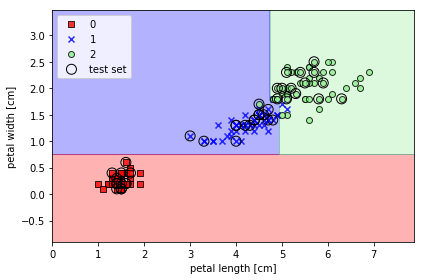

In [3]:
from sklearn import datasets
import numpy as np
from utilities import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [4]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png') 

True

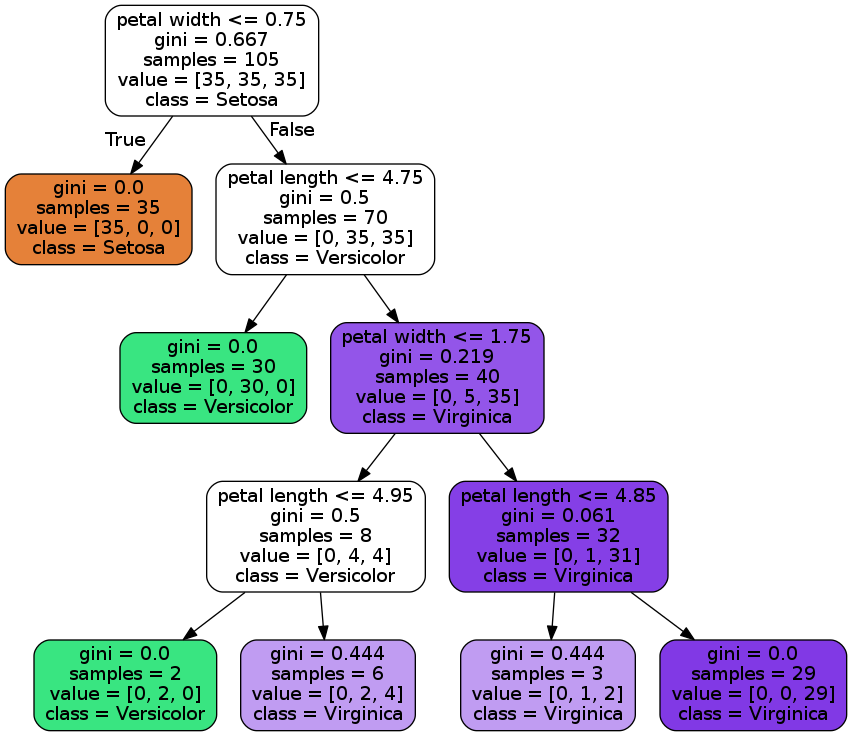

In [7]:
from IPython.display import Image
Image(filename='tree.png', width=600) 

### Avoiding overfitting

